In [19]:
import pandas as pd
import numpy as np

from IPython.display import Image
from tqdm import tqdm

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score

import re
import matplotlib.pyplot as plt

In [1]:
# !gdown 1POmzYEQZgZVqJO3F_cyNcd4QmoNE_mCv

Downloading...
From: https://drive.google.com/uc?id=1POmzYEQZgZVqJO3F_cyNcd4QmoNE_mCv
To: d:\DEEP LEARNING\04. Shrikant Verma DL\Part 04-RNNs\S01.IntoductionRNN\bbc-news-data.csv

  0%|          | 0.00/5.08M [00:00<?, ?B/s]
 10%|█         | 524k/5.08M [00:00<00:02, 1.61MB/s]
 21%|██        | 1.05M/5.08M [00:00<00:02, 1.87MB/s]
 31%|███       | 1.57M/5.08M [00:00<00:01, 1.98MB/s]
 41%|████▏     | 2.10M/5.08M [00:01<00:01, 2.09MB/s]
 52%|█████▏    | 2.62M/5.08M [00:01<00:00, 2.56MB/s]
 72%|███████▏  | 3.67M/5.08M [00:01<00:00, 3.75MB/s]
 93%|█████████▎| 4.72M/5.08M [00:01<00:00, 4.62MB/s]
100%|██████████| 5.08M/5.08M [00:01<00:00, 3.19MB/s]


In [ ]:
# df = pd.read_csv(
#     'bbc-news-data.csv',
#     skiprows=1,                  # Skip the first row
#     nrows=100,                   # Read only the first 100 rows
#     names=['ID', 'Category', 'Text', 'Date'],  # Custom column names
#     dtype={'ID': int, 'Category': str},  # Define column data types
#     na_values=['?', 'NA'],       # Treat '?' and 'NA' as missing values
#     parse_dates=['Date'],        # Parse the 'Date' column as datetime
#     encoding='utf-8'             # Use UTF-8 encoding
# )


In [20]:
df = pd.read_csv('bbc-news-data.csv', encoding='utf-8', delimiter='\t')
df

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...
...,...,...,...,...
2220,tech,397.txt,BT program to beat dialler scams,BT is introducing two initiatives to help bea...
2221,tech,398.txt,Spam e-mails tempt net shoppers,Computer users across the world continue to i...
2222,tech,399.txt,Be careful how you code,A new European directive could put software w...
2223,tech,400.txt,US cyber security chief resigns,The man making sure US computer networks are ...


In [12]:
# Dropping the empty sub-title
"""
This script performs the following operations on a DataFrame `df`:
1. Prints the initial shape of the DataFrame.
2. Drops rows where either the 'title' or 'content' columns have null values.
3. Resets the index of the DataFrame after dropping rows.
4. Prints the shape of the DataFrame after dropping rows.
5. Displays the resulting DataFrame.
"""
print(df.shape)

df = df[((~df.title.isnull()) & (~df.content.isnull()))].reset_index(drop=True)
print(df.shape)

df

(2225, 4)
(2225, 4)


,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...
...,...,...,...,...
2220,tech,397.txt,BT program to beat dialler scams,BT is introducing two initiatives to help bea...
2221,tech,398.txt,Spam e-mails tempt net shoppers,Computer users across the world continue to i...
2222,tech,399.txt,Be careful how you code,A new European directive could put software w...
2223,tech,400.txt,US cyber security chief resigns,The man making sure US computer networks are ...


Text(0, 0.5, 'Count')

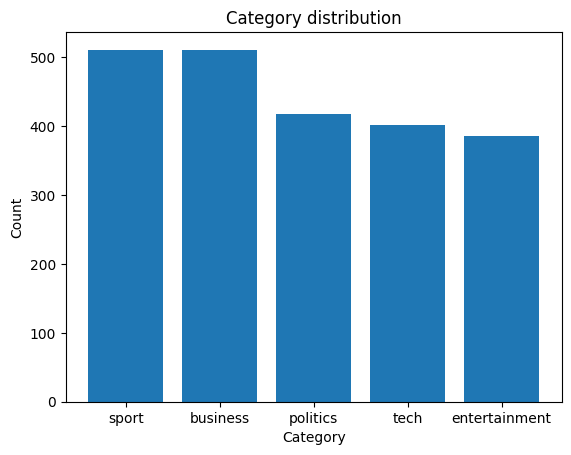

In [21]:
plt.bar(df.category.value_counts().index, df.category.value_counts().values)
plt.title("Category distribution")
plt.xlabel("Category")
plt.ylabel("Count")

In [22]:
ind=1807
print(f'Title: {df.title[ind]}')
print(f'Category: {df.category[ind]}')

Title: Federer joins all-time greats
Category: sport


#### Why MLP would not perform well for this problem?

Before moving to MLP, let's understand what is temporal/Sequential data.

**Temporal component:** Temporal means related to time. As we speak or write we do it in a sequence over time and it may not make sense when we change the order. Such type of data is called sequential/temporal data.

#### Multilayer Perceptron

Let's first build a MultiLayer Perceptron to train a FeedForward NeuralNetwork to classify the given sentence into any of the 5 categories.

For the sake of understanding let's look at one example

**Example sentence:**

Title: "Federer joins all time greats"

The words in the example can be thought of as an individual time step in the sequence.
```plaintext
t-4 t-3 ... ... t
Federer joins all time greats
Xt-4 Xt-3 ... ... Xt
```

<img src="image.png" alt="Image" style="width:50%;">


### What is missing in this architecture?

* **All inputs at once:**

    A simple Feed Forward NN type of architecture assumes that all the inputs(all words from the example) come from a single time steps t. But in reality we speak/write one word after the other so there is mechanism of word order this architecture.

* **Inputs of varying length:**

    A MLP architecture can handle only a fixed-size input. In the example "Federer joins all time greats" the input neurons required are 5. If we have another input "Nadal won the Australian open this year", this example requires 7 input neurons.

### Can we modify this architecture a bit to solve the above said problems?

* **Pass each word at each timestep**

    In the modified MLP architecture we will reuse the same set of weights and pass each words at a timestep from t-n to t. By doing this we are able to pass each word sequentially to the model instead of all at once.    

<img src="image1.png" alt="Image" style="width:50%;">


### Is there something still missing? Yes!!!

Language makes sense only when spoken in an order and the current word depends on the previous words spoken/written

Let's look at a simple example where you will have to fill in the last word

**Fill the last word**

Scenario 1: _______

Scenario 2: Sachin Tendulkar is a _______

Answer: Sachin Tendulkar is a **cricketer**

In Scenario 1, without having access to the previous words it is literally impossible to fill the blank as cricketer. However in scenario 2 it's easy to fill because we know the context of what are the previous words.

* **No connection from previous input words**

    As we pass one word at a time step t, the final output "sports" is not only a function of the last word "greats" passed at time t. But it also depends on the other words "Federer joins all time" as well which are passed from time steps tn-6 tn-1

* **Each word is isolated from the other**

    Even after passing data sequentially by reusing the MLP architecture again and again for each time step, each of the input is still isolated and independent from each other

**What is missing in this modified architecture?**

* **No Temporal component:**

    The temporal component is missing here. Since the MLP model assumes the entire input from X1 to x₁ comes all at once instead of one after the other at each time step

### Let's summarize the problems

* All input passed at once
* Can't handle varying length inputs
* No Temporal connections in the modified MLP

### Can we overcome all these?

Yes!!! RNN comes for the rescue

What we need is an architecture where the current input at time t is processed along with all the prior inputs from t-n to t-1.

To achieve this we will introduce a memory(hidden) state h. This memory state will carry the information from the previous time step to the current time step in a recursive manner. So the information is processed together at the current time step.

Because of this recurrence relation the output is going to be a function of input at the current time step along with the inputs from previous time steps

$$ O_t = f(x_t, h_{t-1})$$

<img src="image2.png" alt="Image" style="width:20%;">


### **What are RNNs**

### When to use them?

When we are dealing with sequential data. In other terms when we have a temporal component associated to it and the data makes sense only when followed a sequence.

**Sequence:** Federer joins all time greats

**No sequence:** all Federer greats time joins

**Example Data:** Time series data(stock price, Weather data), Genomic data, Language texts.

A noteable difference of RNN is how we use the hiddent state (hₜ₋₁) from the previous time step input(Xₜ₋₁) as one of the input for the current time step(t) along with the input (Xₜ)

#### Advantages

* **All inputs at once:**

    A simple Feed Forward NN type of architecture assumes that all the inputs(all words from the example) come from a single time steps t. But in reality we speak/write one word after the other so there is mechanism of word order in this architecture.

* **Inputs of varying length:**

    A simple MLP architecture can handle only a fixed-size input. But RNNs can accommodate variable size input since we are reusing the same RNN unit again and again. In the example "Federer joins all time greats" which is 5 word long can also be passed to the same RNN unit with another example "Nadal won the Australian open this year" which is 7 words long.

* **Weight sharing:**

    RNN is a single unit cells used at every time step. Due to the nature of reusability the weights are shared across all the inputs. This also helps in reduced computation compared to a MLP architecture.

<img src="image3.png" alt="Image">


### **What are the different types of RNN?**

**Types of input & output**

There are couple of variants of RNN based on the number of inputs and the outputs.

<img src="image4.png" alt="Image">


**One to One:** T<sub>x</sub>=1, T<sub>y</sub>=1

**Example:** Normal Feedforward Neural Network

**Many to One:** T<sub>x</sub>>1, T<sub>y</sub>=1

**Example:** Sentiment classification

Sentiment classification is a task of passing a phrase or sentence about a movie review to the model and output if the sentiment is positive or negative.

**Many to Many:** T<sub>x</sub>>1, T<sub>y</sub>>1, T<sub>x</sub>!=T<sub>y</sub>

**Example:** Language translation

Language translation is the task of inputting text to a model in one language and predict the same text in another language of interest(Google translator).

**Many to Many:** T<sub>x</sub>>1, T<sub>y</sub>>1, T<sub>x</sub>=T<sub>y</sub>

**Example:** Named Entity Recognition

Name entity recognition is a task of automatically identifying keywords in the text. The keywords could be the name of the person, name of a company, city, phone number, email etc from the given text.

https://colah.github.io/posts/2015-08-Understanding-LSTMs/

<img src="image5.png" alt="Image" style="width:50%;">


**Xt:**

Xₜ is the input at time step t. In our example above "Federer joins all time greats" each word is passed at a time.
Note: When we say we pass each word to the network we first convert each words to a vector representation of defined length and then pass it to the RNN unit.

**ht-1**

Hidden state from the previous time step which is vector representation of the information from previous time steps
Note: When we are passing the first input the hidden states are initialized to all zeros

**tanh:**

The input from the current time step t and the hidden state from the previous time step t-1 are combined (addition) together and a non-linear activation function is applied. In case of Vanilla RNN it is the tanh

**ht**

Hiddent state from the current time step t. This state is updated at everytime step which is a function of the input at current time step t and the previous hidden state hₜ₋₁


**Oₜ** 

Oₜ is the output of RNN. It can be single or multi output based on the use case. Also based on the use cases we can get output at everytime step or only at the last time step.

**But do we pass the words as is to the RNN cell?**

No we don't, We all know machines can't understand text but only numbers

Then, How the do we convert the text to numbers? Let's understand with an example.

There are 2 ways this can be done

1. Using pre-trained word embeddings like Word2Vec, Glove, ELMO etc.
2. Learning the embeddings while training the LSTM model

**Example sentence 1:** "the cat sat on the same wall the rat sat"

**Example sentence 2:** "the cat likes milk"

**Method 1**

* For the above 2 example sentences we convert each word to vectors using the pretrained embedding and then pass them to the RNN cell.
* We can set the trainable method to False if we don't want to fine-tune these embeddings while training.
* We can choose the dimension of the word embedding for these pretrained word embedding models.

**Method 2**

* First we create a vocabulary of all unique words in the dataset
* For the above sentences the vocabulary size is 9 and we assign index to each word.

{cat:0, likes:1, milk:2, on:3, rat:4, same:5, sat:6, the:7, wall:8}

* There is a embedding layer of said dimension before passing it to the RNN cell
* The word embeddings are assigned to each word indexes i.e 0 to 8

* The word embeddings are randomly initialized in the embedding layer for the given dimension and is learnt during the training process by setting trainable=True

Let's say we choose embedding dimension as 3 then embedding vector for each word would look like

    cat(0) = [0.2, 0.64, 0.4]
    likes(1) = [0.7, 0.34, 0.4]
    milk(2) = [0.6, 0.5, 0.23]
    on(3) = [0.1, 0.2, 0.04]
    rat(4) = [0.94, 0.8, 0.9]
    same(5) = [0.45, 0.23, 0.26]
    sat(6) = [0.78, 0.9, 0.5]
    the(7) = [0.25, 0.16, 0.2]
    wall(8) = [0.11, 0.93, 0.01]

**Note:** The embedding dimensions could be of any size. The most commonly used dimensions are 100 to 300.

## What is being learnt?

* Similar to the MLP architecture we have weight matrices in RNN which are learnt during the training

    * **W<sub>hx</sub>:** The weight matrix at the input
    * **W<sub>hh</sub>:** The weight matrix at the hidden state
    * **W<sub>hy</sub>:** The weight matrix at the output

* **Note:** The same set of weights will be applied at each time steps during the training.

<img src="image6.png" alt="Image" style="width:100%;">
<img src="image7.png" alt="Image" style="width:100%;">



### How Forward Propagation works in RNN?

<img src="image8.png" alt="Image" style="width:100%;">

### Steps in Forward Propagation

For each word in the input:

1. Multiply previous hidden state with weight matrix W
2. Multiply input word with weight matrix U
3. Add 1. and 2. and bias
4. Apply the Non-Linear Activation Function (tanh)
    * i. A copy of 4. is multiplied with weight matrix V
    * ii. Add bias to 4i. and apply the non-Linear Activation function(based on usecase)
    * iii. Calculate Loss (based on usecase)
5. A copy of 4. is passed as hidden state to the next time step

**The above steps can be mathematically generalized as**

Z<sub>ht</sub> = UX<sub>t</sub> + Wh<sub>t-1</sub> + b<sub>h</sub>

h<sub>t</sub> = σ<sub>h</sub>(Z<sub>ht</sub>)

Z<sub>yt</sub> = V<sup>T</sup>h<sub>t</sub> + b<sub>y</sub>

O<sub>t</sub> = σ<sub>y</sub>(Z<sub>yt</sub>)

L = L(O<sub>t</sub>, Y<sub>t</sub>)

## Backward propagation

<img src="image9.png" alt="Image" style="width:100%;">

## Usual steps involved in updating parameter weights:
* Calculate the gradients of the loss with respect to the parameters
* Multiply it with the Learning rate
* Update the new weights

**Equations:**

$$ V = V - \alpha \frac{\partial L}{\partial V} $$

$$ W = W - \alpha \frac{\partial L}{\partial W} $$

$$ U = U - \alpha \frac{\partial L}{\partial U} $$

$\alpha$ = Learning rate


<img src="image11.png" alt="Image" style="width:100%;">

**Backpropagation Through Time (BPTT) vs. Regular Backpropagation**

**Key Differences:**

1. **Shared Weights:**
   - In traditional Multi-Layer Perceptrons (MLPs), each layer has its own distinct set of weights.
   - In Recurrent Neural Networks (RNNs), the same weight matrices are reused at every time step.

2. **Gradient Calculation:**
   - In MLPs, backpropagation calculates gradients layer by layer, updating weights based on the errors at each layer.
   - In BPTT, gradients are calculated across all time steps, accumulating the error signals to make a single update to the shared weights.

**In Essence:**

BPTT extends the concept of backpropagation to handle the sequential nature of RNNs. It accounts for the shared weights and calculates gradients by "unfolding" the RNN over time, effectively treating it as a very deep neural network.


## Loss function

**What is a Loss function and why we need?**

* The Loss function helps to determine how good or bad the model is performing comparing it with the actual output.
* These are many loss functions based on the problem we are solving and the most commonly used loss metrics are
    * Regression: RMSE, MSE, SSE
    * Binary classification: Binary cross-entrophy loss
    * Multiclass classification: Multiclass cross-entrophy loss

**What Loss function should we use?**

Since we are solving a Multiclass classification problem, Multiclass cross-entrophy loss is the right

$$L_{t}=-Y \log(O_{t})$$

### **Optimizing with respect to V**

* As a first step we need to calculate the gradients of the loss Lₜ at time t with respect to the weight matrix V
* As we go through the path we see that Oₜ depends on Zₜ to reach V and will make use of the chain rule to calculate the gradients. 

$$\frac{\partial{L_t}}{\partial{V}} = \frac{\partial{L_t}}{\partial{O_t}} * \frac{\partial{O_t}}{\partial{Z_t}} * \frac{\partial{Z_t}}{\partial{V}}$$

#### **Update the weight matrix V**

$$V = V - α ∂Lₜ/∂V$$

## Optimizing with respect to W

* As a first step we need to calculate the gradients of the loss Lₜ at time t with respect to the weight matrix W
* As we go through the path we see that hₜ depends on W and hₜ₋₁ directly. But hₜ₋₁ indirectly depends on W.
* When we look at hₜ₋₁, it directly depends on W and hₜ₋₂. But hₜ₋₂ indirectly depends on W.
* This keeps chaining due to the dependencies on time and we can calculate the gradients with respect to each time step using the chain rule in calculus
* A very important thing to note here is the weight matrix W is common across all the time steps


**General Formula:**

$$
\frac{\partial{L_t}}{\partial{W}} = \frac{\partial{L_t}}{\partial{O_t}} * \frac{\partial{O_t}}{\partial{Z_t}} * \frac{\partial{Z_t}}{\partial{h_t}} * \frac{\partial{h_t}}{\partial{W}}
$$

**Gradients of loss with respect to W at different t:**



$$
\frac{\partial h_{t}}{\partial W} = \frac{\partial h_{t}}{\partial W} + \frac{\partial h_{t}}{\partial h_{t-1}} * \frac{\partial h_{t-1}}{\partial W} 
$$

$$
\frac{\partial h_{t-1}}{\partial W} = \frac{\partial h_{t-1}}{\partial W} + \frac{\partial h_{t-1}}{\partial h_{t-2}} * \frac{\partial h_{t-2}}{\partial W} 
$$

$$
\frac{\partial h_{t-2}}{\partial W} = \frac{\partial h_{t-2}}{\partial W} + \frac{\partial h_{t-2}}{\partial h_{t-3}} * \frac{\partial h_{t-3}}{\partial W} 
$$

$$
\frac{\partial h_{t-3}}{\partial W} = \frac{\partial h_{t-3}}{\partial W} + \frac{\partial h_{t-3}}{\partial h_{t-4}} * \frac{\partial h_{t-4}}{\partial W} 
$$

$$
\frac{\partial h_{t-4}}{\partial W} = \frac{\partial h_{t-4}}{\partial W} + \frac{\partial h_{t-4}}{\partial h_{t-5}} * \frac{\partial h_{t-5}}{\partial W}
$$

$$
\frac{\partial L_t}{\partial W} = \frac{\partial L_t}{\partial O_t} * \frac{\partial O_t}{\partial Z_t} * \frac{\partial Z_t}{\partial h_t} * \left( \frac{\partial h_t}{\partial W} + \frac{\partial h_t}{\partial h_{t-1}} * \frac{\partial h_{t-1}}{\partial W} + \frac{\partial h_t}{\partial h_{t-2}} * \frac{\partial h_{t-2}}{\partial h_{t-1}} * \frac{\partial h_{t-1}}{\partial W} + \frac{\partial h_t}{\partial h_{t-3}} * \frac{\partial h_{t-3}}{\partial h_{t-2}} * \frac{\partial h_{t-2}}{\partial h_{t-1}} * \frac{\partial h_{t-1}}{\partial W} + \frac{\partial h_t}{\partial h_{t-4}} * \frac{\partial h_{t-4}}{\partial h_{t-3}} * \frac{\partial h_{t-3}}{\partial h_{t-2}} * \frac{\partial h_{t-2}}{\partial h_{t-1}} * \frac{\partial h_{t-1}}{\partial W} + \frac{\partial h_t}{\partial h_{t-5}} * \frac{\partial h_{t-5}}{\partial h_{t-4}} * \frac{\partial h_{t-4}}{\partial h_{t-3}} * \frac{\partial h_{t-3}}{\partial h_{t-2}} * \frac{\partial h_{t-2}}{\partial h_{t-1}} * \frac{\partial h_{t-1}}{\partial W} \right)
$$

___Expanding it___

$$
\frac{\partial{L_t}}{\partial{W}} = \frac{\partial{L_t}}{\partial{O_t}} * \frac{\partial{O_t}}{\partial{Z_t}} * \frac{\partial{Z_t}}{\partial{h_t}} 
$$

$$
\frac{\partial{L_t}}{\partial{O_t}} * \frac{\partial{O_t}}{\partial{Z_t}} * \frac{\partial{Z_t}}{\partial{h_t}} * \frac{\partial{h_t}}{\partial{h_{t-1}}} * \frac{\partial{h_{t-1}}}{\partial{W}} 
$$

$$
\frac{\partial{L_t}}{\partial{O_t}} * \frac{\partial{O_t}}{\partial{Z_t}} * \frac{\partial{Z_t}}{\partial{h_t}} * \frac{\partial{h_t}}{\partial{h_{t-1}}} * \frac{\partial{h_{t-1}}}{\partial{h_{t-2}}} * \frac{\partial{h_{t-2}}}{\partial{W}} 
$$

$$
\frac{\partial{L_t}}{\partial{O_t}} * \frac{\partial{O_t}}{\partial{Z_t}} * \frac{\partial{Z_t}}{\partial{h_t}} * \frac{\partial{h_t}}{\partial{h_{t-1}}} * \frac{\partial{h_{t-1}}}{\partial{h_{t-2}}} * \frac{\partial{h_{t-2}}}{\partial{h_{t-3}}} * \frac{\partial{h_{t-3}}}{\partial{W}} 
$$

$$
\frac{\partial{L_t}}{\partial{O_t}} * \frac{\partial{O_t}}{\partial{Z_t}} * \frac{\partial{Z_t}}{\partial{h_t}} * \frac{\partial{h_t}}{\partial{h_{t-1}}} * \frac{\partial{h_{t-1}}}{\partial{h_{t-2}}} * \frac{\partial{h_{t-2}}}{\partial{h_{t-3}}} * \frac{\partial{h_{t-3}}}{\partial{h_{t-4}}} * \frac{\partial{h_{t-4}}}{\partial{W}} 
$$

$$
\frac{\partial{L_t}}{\partial{O_t}} * \frac{\partial{O_t}}{\partial{Z_t}} * \frac{\partial{Z_t}}{\partial{h_t}} * \frac{\partial{h_t}}{\partial{h_{t-1}}} * \frac{\partial{h_{t-1}}}{\partial{h_{t-2}}} * \frac{\partial{h_{t-2}}}{\partial{h_{t-3}}} * \frac{\partial{h_{t-3}}}{\partial{h_{t-4}}} * \frac{\partial{h_{t-4}}}{\partial{h_{t-5}}} * \frac{\partial{h_{t-5}}}{\partial{W}}
$$

Let generalize this to a single formula

$$
\frac{\partial{L_t}}{\partial{W}} = \frac{\partial{L_t}}{\partial{O_t}} * \frac{\partial{O_t}}{\partial{Z_t}} * \frac{\partial{Z_t}}{\partial{h_t}} * \sum_{r=1}^{t} \frac{\partial{h_t}}{\partial{h_{t-r}}} * \frac{\partial{h_{t-r}}}{\partial{W}}
$$

#### **Update the weight matrix W**

$$W = W - α ∂Lₜ/∂W$$

#### Optimizing with respect to U

Taking the derivative of U is similar to how we calculated the gradients with respect to W. It also requires taking sequential derivatives with respect to hₜ. So we can rewrite the same formula we derived and replace W with U.

$$
\frac{\partial{L_t}}{\partial{U}} = \frac{\partial{L_t}}{\partial{O_t}} * \frac{\partial{O_t}}{\partial{Z_t}} * \frac{\partial{Z_t}}{\partial{h_t}} * \sum_{r=1}^{t} \frac{\partial{h_t}}{\partial{h_{t-r}}} * \frac{\partial{h_{t-r}}}{\partial{U}}
$$

#### Update the weight matrix U

$$U = U - α ∂Lₜ/∂U$$

#### What if we had a multi-output problem? MultiLoss

<img src="image12.png" alt="Image" style="width:70%;">
<img src="image13.png" alt="Image" style="width:70%;">

$$L = \sum_{r=1}^{t} L_r$$

* Can we use information from the future as well?

Yes we can and it's called **Bidirectional RNN**

<img src="image14.png" alt="Image" style="width:70%;">
<img src="image15.png" alt="Image" style="width:70%;">

Scenario 1: Sachin Tendular was ______

Scenario 2: Sachin Tendular was ______ of Rajya Sabha

Answer: Sachin Tendular was **MP** of Rajya Sabha

In the scenario 2, it's easier to predict the word "MP" if we had access to input from both the left and the right of the current word instead of only the words from the left.

| Feature | UniDirectional RNN | BiDirectional RNN |
|---|---|---|
| Information flow | Left to Right | Left to Right & Right to Left |
| Output depends | h<sub>t-1</sub>, X<sub>t</sub> | h<sub>t-1</sub>, X<sub>t</sub>, h<sub>t+1</sub> |
| Weights | W, U, V | W, U, V, W', U', V' |

**▼ Code Implementation**

In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Embedding, Input, InputLayer, RNN, SimpleRNN, LSTM, GRU, TimeDistributed
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
def data_cleaning(text):

    # Lower the words in the sentence
    cleaned = text.lower()

    # Replace the full stop with a full stop and space
    cleaned = cleaned.replace(".", ". ")

    # Remove the stop words
    tokens = [word for word in cleaned.split() if not word in stop_words]
    # tokens = []  # Initialize an empty list to store tokens
    # for word in cleaned.split():
    #     if word not in stop_words:
    #         tokens.append(word)

    # Remove the punctuations
    tokens = [tok.translate(str.maketrans('', '', string.punctuation)) for tok in tokens]

    # Joining the tokens back to form the sentence
    cleaned = " ".join(tokens)

    # Remove any extra spaces
    cleaned = cleaned.strip()

    return cleaned


### **Input Example**:
```python
text = "Hello, world! This is a sample text. Let's clean it."
stop_words = {"is", "a", "it", "this"}  # Define some stop words
```

### **Dry Run Steps:**

#### 1. **Lowercase the Words:**
```python
cleaned = text.lower()
# cleaned = "hello, world! this is a sample text. let's clean it."
```

#### 2. **Replace Full Stop with Full Stop and Space:**
```python
cleaned = cleaned.replace(".", ". ")
# cleaned = "hello, world! this is a sample text.  let's clean it."
```

#### 3. **Remove Stop Words:**
- Split the string into words: `cleaned.split()`  
  → `['hello,', 'world!', 'this', 'is', 'a', 'sample', 'text.', "let's", 'clean', 'it.']`

- Filter out the stop words (`stop_words = {"is", "a", "it", "this"}`):
```python
tokens = [word for word in cleaned.split() if not word in stop_words]
# tokens = ['hello,', 'world!', 'sample', 'text.', "let's", 'clean', 'it.']
```

#### 4. **Remove Punctuation:**
- Remove punctuation using `str.maketrans()`:
  ```python
  tokens = [tok.translate(str.maketrans('', '', string.punctuation)) for tok in tokens]
  # tokens = ['hello', 'world', 'sample', 'text', 'lets', 'clean', 'it']
  ```

#### 5. **Join Tokens Back into a Sentence:**
```python
cleaned = " ".join(tokens)
# cleaned = "hello world sample text lets clean it"
```

#### 6. **Remove Extra Spaces:**
- Remove any leading or trailing spaces (though none exist here):
```python
cleaned = cleaned.strip()
# cleaned = "hello world sample text lets clean it"
```

### **Final Output:**
```python
"hello world sample text lets clean it"
```

### **Explanation of Each Step:**
1. **Lowercasing** ensures case uniformity.
2. **Adding a space after full stops** ensures proper tokenization later.
3. **Removing stop words** reduces noise in the data.
4. **Removing punctuation** ensures tokens are only words.
5. **Joining tokens** reconstructs a cleaned sentence.
6. **Stripping extra spaces** polishes the result for clean output.



In [10]:
from tqdm import tqdm
import time
for index, data in tqdm(df.iterrows(), total=df.shape[0]):
    df.loc[index, 'title'] = data_cleaning(data['title'])

100%|██████████| 2225/2225 [00:00<00:00, 7693.80it/s]


<Axes: ylabel='title'>

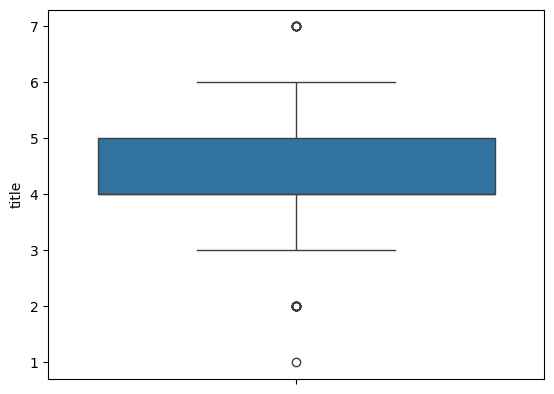

In [11]:
sns.boxplot(df['title'].str.split(" ").str.len())

### **Code**:
```python
np.random.seed(100)
train_X, test_X, train_Y, test_Y = train_test_split(df['title'], 
                                                 df['category'], 
                                                 test_size=0.2, 
                                                 random_state=100)

train_X = train_X.reset_index(drop=True)
test_X = test_X.reset_index(drop=True)
train_Y = train_Y.reset_index(drop=True)
test_Y = test_Y.reset_index(drop=True)
```

---

### **Assume Sample DataFrame `df`**:
```plaintext
   title                                            category
0  "This is a short title"                               news
1  "This title is slightly longer than the previous one"    news
2  "A very long title indeed with many words"              sports
3  "Breaking news: Something happened"                    news
4  "Sports update: Big game tomorrow"                     sports
5  "Another news headline for testing"                    news
```

---

### **Dry Run**:

#### Step 1: Set the random seed
```python
np.random.seed(100)
```
- This ensures the random splitting is reproducible.

---

#### Step 2: Split the data into training and testing sets
```python
train_X, test_X, train_Y, test_Y = train_test_split(df['title'], 
                                                    df['category'], 
                                                    test_size=0.2, 
                                                    random_state=100)
```
- **test_size=0.2**: 20% of the data is allocated to the testing set, and 80% to the training set.
- **random_state=100**: Ensures consistent splitting.

The split might result in:

**Training Data**:
```plaintext
train_X: 
1  "This title is slightly longer than the previous one"
5  "Another news headline for testing"
4  "Sports update: Big game tomorrow"
2  "A very long title indeed with many words"

train_Y:
1  "news"
5  "news"
4  "sports"
2  "sports"
```

**Testing Data**:
```plaintext
test_X: 
3  "Breaking news: Something happened"
0  "This is a short title"

test_Y:
3  "news"
0  "news"
```

---

#### Step 3: Reset the indices
```python
train_X = train_X.reset_index(drop=True)
test_X = test_X.reset_index(drop=True)
train_Y = train_Y.reset_index(drop=True)
test_Y = test_Y.reset_index(drop=True)
```
- The indices of the resulting training and testing sets are reset to start from 0.

After resetting indices:

**Training Data**:
```plaintext
train_X:
0  "This title is slightly longer than the previous one"
1  "Another news headline for testing"
2  "Sports update: Big game tomorrow"
3  "A very long title indeed with many words"

train_Y:
0  "news"
1  "news"
2  "sports"
3  "sports"
```

**Testing Data**:
```plaintext
test_X:
0  "Breaking news: Something happened"
1  "This is a short title"

test_Y:
0  "news"
1  "news"
```

---

### **Final Result**:
The data is split into training and testing sets, with indices reset. The training set contains 4 samples (80%), and the testing set contains 2 samples (20%). This ensures a clean structure for further analysis or model training.

In [12]:
# Find the maximum sentence length
max_sentence_len = df['title'].str.split(" ").str.len().max()
total_classes = df.category.nunique()

print(f"Maximum sequence length: {max_sentence_len}")
print(f"Total classes: {total_classes}")

# Output:
# Maximum sequence length: 7
# Total classes: 5

# Splitting the data to train and test
np.random.seed(100)
train_X, test_X, train_Y, test_Y = train_test_split(df['title'], 
                                                 df['category'], 
                                                 test_size=0.2, 
                                                 random_state=100)

train_X = train_X.reset_index(drop=True)
test_X = test_X.reset_index(drop=True)
train_Y = train_Y.reset_index(drop=True)
test_Y = test_Y.reset_index(drop=True)

Maximum sequence length: 7
Total classes: 5


In [13]:
# One hot Encode the labels
train_Y = pd.get_dummies(train_Y).values
test_Y = pd.get_dummies(test_Y).values

# Get validation labels
validation = test_Y.argmax(axis=1) 

# Tokenize the input text and pad them


```python
train_Y = pd.get_dummies(train_Y).values
test_Y = pd.get_dummies(test_Y).values
```

- `pd.get_dummies()` converts each unique category in the data into a binary column.

#### Processing `train_Y`:
- Unique categories: `['sports', 'news', 'entertainment']`.
- Each category is assigned a binary vector:
  - `sports`: `[1, 0, 0]`
  - `news`: `[0, 1, 0]`
  - `entertainment`: `[0, 0, 1]`
- Transformed `train_Y`:
```python
array([[1, 0, 0],   # sports
       [0, 1, 0],   # news
       [0, 0, 1],   # entertainment
       [1, 0, 0],   # sports
       [0, 1, 0]])  # news
```

#### Processing `test_Y`:
- Unique categories are the same: `['sports', 'news', 'entertainment']`.
- Transformed `test_Y`:
```python
array([[0, 1, 0],   # news
       [1, 0, 0],   # sports
       [0, 0, 1],   # entertainment
       [1, 0, 0]])  # sports
```
### Step 2: Extracting Validation Labels

#### Code:
```python
validation = test_Y.argmax(axis=1)
```

#### Explanation:
- `argmax(axis=1)` finds the index of the maximum value in each row.
- Each index corresponds to the original category:
  - `[0, 1, 0]` → `1` (news)
  - `[1, 0, 0]` → `0` (sports)
  - `[0, 0, 1]` → `2` (entertainment)

#### Result:
```python
validation = array([1, 0, 2, 0])  # [news, sports, entertainment, sports]
```



### Dry Run Summary:

1. **One-Hot Encoded `train_Y`**:
```python
array([[1, 0, 0],  # sports
       [0, 1, 0],  # news
       [0, 0, 1],  # entertainment
       [1, 0, 0],  # sports
       [0, 1, 0]]) # news
```

2. **One-Hot Encoded `test_Y`**:
```python
array([[0, 1, 0],  # news
       [1, 0, 0],  # sports
       [0, 0, 1],  # entertainment
       [1, 0, 0]]) # sports
```

3. **Validation Labels (`validation`)**:
```python
array([1, 0, 2, 0])  # [news, sports, entertainment, sports]
```


In [17]:
def tokenize_and_pad(inp_text, max_len, tok):
    text_seq = tok.texts_to_sequences(inp_text)
    text_seq = pad_sequences(text_seq, maxlen=max_len, padding='post')
    return text_seq

text_tok = Tokenizer()
text_tok.fit_on_texts(train_X)

train_text_X = tokenize_and_pad(inp_text=train_X, max_len=max_sentence_len, tok=text_tok)
test_text_X = tokenize_and_pad(inp_text=test_X, max_len=max_sentence_len, tok=text_tok)

vocab_size = len(text_tok.word_index) + 1

print("Overall text vocab size:", vocab_size)

Overall text vocab size: 3339


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Function to tokenize and pad input text
def tokenize_and_pad(input_text, max_length, tokenizer):
    # Convert text into sequences of numbers based on the tokenizer
    tokenized_sequences = tokenizer.texts_to_sequences(input_text)
    # Pad the sequences to the specified max_length
    padded_sequences = pad_sequences(tokenized_sequences, maxlen=max_length, padding='post')
    return padded_sequences

# Step 1: Initialize the tokenizer
text_tokenizer = Tokenizer()

# Step 2: Fit the tokenizer on training data
text_tokenizer.fit_on_texts(train_X)

# Step 3: Tokenize and pad training data
train_padded_sequences = tokenize_and_pad(
    input_text=train_X, 
    max_length=max_sentence_len, 
    tokenizer=text_tokenizer
)

# Step 4: Tokenize and pad test data
test_padded_sequences = tokenize_and_pad(
    input_text=test_X, 
    max_length=max_sentence_len, 
    tokenizer=text_tokenizer
)

# Step 5: Calculate the vocabulary size
# Adding 1 because index 0 is reserved for padding
vocabulary_size = len(text_tokenizer.word_index) + 1

# Print the vocabulary size
print("Overall text vocabulary size:", vocabulary_size)


### Dry Run:

#### Given Inputs:
- `train_X` = ["The quick brown fox jumps over the lazy dog", "A journey of a thousand miles begins with a single step"]
- `test_X` = ["The lazy dog lies down", "A thousand miles away"]
- `max_sentence_len` = 10

#### Steps:

1. **Step 1: Initialize Tokenizer**  
   - `text_tokenizer = Tokenizer()`  
   Initializes a Tokenizer object to handle the text processing.

2. **Step 2: Fit Tokenizer on Training Data**  
   - `text_tokenizer.fit_on_texts(train_X)`  
   This builds the vocabulary from the `train_X` data. After fitting, `text_tokenizer.word_index` will look something like:
   ```python
   {
       'the': 1,
       'a': 2,
       'of': 3,
       'a': 4,
       'thousand': 5,
       'and': 6,
       'miles': 7,
       'quick': 8,
       ...
   }
   ```

3. **Step 3: Tokenize and Pad Training Data**  
   - `train_padded_sequences = tokenize_and_pad(...)`  
   Convert each sentence into a sequence of integers (tokenized) and pad them to 10 tokens:
   ```python
   # Tokenized and padded sequences might look like this:
   [[1, 8, 9, 4, 10, 11, 3, 12, 13, 14],  # "The quick brown fox ..."
    [2, 15, 3, 7, 16, 4, 17, 18, 19, 20]]  # "A journey of a thousand ..."
   ```

4. **Step 4: Tokenize and Pad Test Data**  
   - `test_padded_sequences = tokenize_and_pad(...)`  
   Similar tokenization and padding applied to the test data:
   ```python
   [[1, 13, 14, 6, 21, 22, 23, 24, 0, 0],  # "The lazy dog lies down"
    [2, 5, 7, 8, 25, 0, 0, 0, 0, 0]]  # "A thousand miles away"
   ```

5. **Step 5: Vocabulary Size Calculation**  
   - `vocabulary_size = len(text_tokenizer.word_index) + 1`  
   The vocabulary size is the total unique words in the `train_X` data + 1 for the padding token:
   ```python
   vocabulary_size = 18
   ```

#### Output:
```plaintext
Overall text vocabulary size: 18
```

In [15]:
# Latent dimension: Dimension of the weight matrix U, V, W
latent_dim = 50

# Embedding dimension: Dimension of the word embeddings at the embedding layer
embedding_dim = 100

- Define the RNN model architecture

    * The embedding layer with 100 dimension
    * A single Vanilla RNN unit with 50 dimensions
    * A final output layer with 5 units (5 classes) with the softmax activation function

In [18]:
seed=56
tf.random.set_seed(seed)
np.random.seed(seed)

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, trainable=True))
model.add(SimpleRNN(latent_dim, recurrent_dropout=0.2, return_sequences=False, activation='tanh'))
model.add(Dense(total_classes, activation='softmax'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

```python
seed = 56
tf.random.set_seed(seed)  # Sets the seed for TensorFlow's random number generator
np.random.seed(seed)     # Sets the seed for NumPy's random number generator
```

### Why Use a Seed?
1. **Reproducibility**:  
   When you train a machine learning or deep learning model, random processes (like initializing weights, shuffling data, and dropout) are involved. Without a seed, the results will vary slightly every time you run the code. By setting a seed, you ensure the same random numbers are used, leading to consistent results.

2. **Debugging**:  
   If a specific model behavior or issue arises, using a seed allows you to reproduce the exact same conditions, making it easier to debug.

3. **Fair Comparisons**:  
   When comparing multiple models or parameter settings, a seed ensures that the randomness is consistent across experiments. This makes it easier to determine which model or configuration performs better under identical conditions.

### Randomness in the Code:
In the given model:
1. **Embedding Layer Initialization**:  
   The `Embedding` layer uses random initialization for the word embeddings.
2. **SimpleRNN Layer Initialization**:  
   The weights of the RNN are initialized randomly.
3. **Dropout in RNN**:  
   The `recurrent_dropout` parameter in the `SimpleRNN` layer involves random dropping of recurrent connections.

Without a seed, these processes would differ each time the model is run, leading to different results.

### Summary:
Setting the seed ensures that:
- The random initialization of weights in layers is consistent.
- Any randomness in data preprocessing or augmentation is reproducible.
- The behavior of stochastic operations (e.g., dropout) is consistent across runs.

This is especially useful when sharing results or collaborating on a project to ensure everyone observes the same outcomes.

#### **Model training**

* **Optimizer:** Adam
* **Loss:** Categorical cross-entropy since it is a multiclass classification problem
* **Early stopping:** Used to stop training if validation accuracy does not improve while training to avoid overfitting

In [ ]:
tf.random.set_seed(seed)
np.random.seed(seed)

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['acc'])

early_stopping = EarlyStopping(monitor='val_acc', 
                               mode='max', 
                               verbose=1, 
                               patience=5)

model.fit(x=train_text_X, y=train_Y, 
          validation_data=(test_text_X, test_Y),
          batch_size=64, 
          epochs=10, 
          callbacks=[early_stopping])


### 1. **Model Compilation**
```python
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['acc'])
```
- **`optimizer='Adam'`**: Specifies the Adam optimizer, which is widely used because it combines the benefits of both **Adagrad** and **RMSProp** optimizers. Adam adapts learning rates during training, making it effective for a variety of tasks.
  
- **`loss='categorical_crossentropy'`**: Specifies the loss function to be minimized. Since this is a classification problem with one-hot encoded labels, categorical cross-entropy is used. It measures the difference between the true labels and the predicted probabilities.

- **`metrics=['acc']`**: Specifies accuracy as the evaluation metric during training and validation.

---

### 2. **Early Stopping Callback**
```python
early_stopping = EarlyStopping(monitor='val_acc', 
                               mode='max', 
                               verbose=1, 
                               patience=5)
```
- **`EarlyStopping`**: This is a callback that stops training when a monitored metric stops improving.
  
- **`monitor='val_acc'`**: Monitors the validation accuracy (`val_acc`).
  
- **`mode='max'`**: Looks for the maximum value of the monitored metric (validation accuracy). Training stops if the validation accuracy doesn’t improve.
  
- **`verbose=1`**: Enables detailed messages about when early stopping occurs.
  
- **`patience=5`**: Specifies how many epochs to wait before stopping if no improvement is observed. Here, training stops if validation accuracy doesn’t improve for 5 consecutive epochs.

---

### 3. **Model Training**
```python
model.fit(x=train_text_X, y=train_Y, 
          validation_data=(test_text_X, test_Y),
          batch_size=64, 
          epochs=10, 
          callbacks=[early_stopping])
```

#### Parameters:
- **`x=train_text_X, y=train_Y`**: Training data (`train_text_X`) and corresponding labels (`train_Y`).
  
- **`validation_data=(test_text_X, test_Y)`**: Validation data and labels used to evaluate the model’s performance after each epoch. This does not affect training but helps monitor overfitting.

- **`batch_size=64`**: The number of samples processed before the model updates its weights. A batch size of 64 means the data is split into chunks of 64 samples for processing.

- **`epochs=10`**: The maximum number of passes over the entire training dataset.

- **`callbacks=[early_stopping]`**: Passes the early stopping callback, so training stops early if validation accuracy does not improve for 5 epochs.

---

### Workflow:
1. The model is trained on `train_text_X` and `train_Y`.
2. After each epoch:
   - The loss and accuracy are calculated on the training data.
   - Validation loss and accuracy are calculated using `test_text_X` and `test_Y`.
   - Early stopping checks if validation accuracy has improved.
3. If validation accuracy does not improve for 5 epochs, training halts early to avoid overfitting or wasting resources.
4. If the model runs for all 10 epochs, it stops after completing them.

---

### Why Use These Settings?
1. **Adam Optimizer**: Efficient and works well for most tasks.
2. **Categorical Cross-Entropy**: Appropriate for multi-class classification.
3. **Early Stopping**: Prevents overfitting and reduces computation time by stopping when further training is unlikely to improve performance.
4. **Validation Data**: Helps monitor the model's ability to generalize to unseen data.

This setup ensures efficient training while avoiding overfitting or unnecessary computation.

In [ ]:
# Make predictions on the test dataset
prediction = model.predict(test_text_X)
prediction = prediction.argmax(axis=1)

print(f"Accuracy: {accuracy_score(prediction, validation)}") 

# Confusion matrix of the prediction and actual
cm = confusion_matrix(validation, prediction) 

plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, cmap="Oranges")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

## Conclusions

**Things to keep in mind**

* RNN takes the current input at time t as well as the hidden state from the previous time stamp t-1.
* There are 3 weight Matrices W, U, V from the input, hidden state and output and W, U, V, W', U', V' respectively interms of bi-directional RNN
* BiDirectional RNN process information from left to right and also from riogh
* The same RNN unit is reused for all the input so weights are shared across all time steps.
* The gradients are calculated over time which is called the BPPT.
* Backpropagation through time: what it does and how to do it- https://axon.cs.byu.edu/Dan/678/papers/Recurrent/Werbos.pdf